In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
#!sudo apt-get install -y fonts-nanum
#!sudo fc-cache -fv
#!rm ~/.cache/matplotlib -rf

In [ ]:
import matplotlib.font_manager as fm
import os
import matplotlib.pyplot as plt

# apt-get : 패키지 설치 명령어
# -qq : 에러외의 메세지 숨기는 옵션키
!apt-get -qq install fonts-nanum

In [ ]:
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설정
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
csv_file_path = "/content/drive/MyDrive/dummy.csv"
df = pd.read_csv(csv_file_path, encoding="utf-8-sig")

In [ ]:
df.head()

,ADVRTS_TIME,UNIT_ACCTO_ADVRTS_ODR,UNIT_ACCTO_ADVRTS_CO,TVGRP_CO,frequency,TYPE_자막,TYPE_토막,TYPE_프로,CLASS_A,CLASS_B,CLASS_C,CLASS_SA,AD_POS_그외,AD_POS_전,AD_POS_중간,AD_POS_후,요일_Saturday,요일_Sunday,요일_Weekday
0,1,3,3,1,0,False,False,True,True,False,False,False,False,False,False,True,False,True,False
1,1,3,3,0,0,False,False,True,True,False,False,False,False,False,False,True,False,True,False
2,1,3,3,1,0,False,False,True,True,False,False,False,False,False,False,True,False,True,False
3,1,3,3,0,0,False,False,True,True,False,False,False,False,False,False,True,False,True,False
4,1,3,3,1,0,False,False,True,True,False,False,False,False,False,False,True,False,True,False


In [ ]:
df['TVGRP_CO'].describe()

,TVGRP_CO
count,1.133612e+06
mean,1.894825e+00
std,2.605996e+00
min,0.000000e+00
25%,0.000000e+00
50%,1.000000e+00
75%,2.000000e+00
max,3.800000e+01


<ipython-input-94-e87b92684d70>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='요일', y='TVGRP_CO', data=df, palette='Set2')


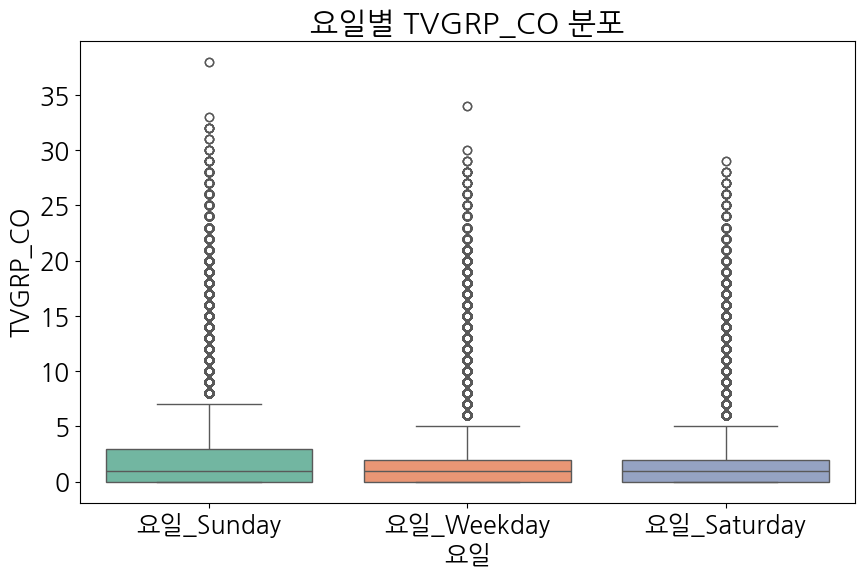

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 요일 데이터를 "요일"이라는 하나의 열로 변환
df['요일'] = df[['요일_Saturday', '요일_Sunday', '요일_Weekday']].idxmax(axis=1)

# 요일별 TVGRP_CO 분포 박스플롯
plt.figure(figsize=(10, 6))
sns.boxplot(x='요일', y='TVGRP_CO', data=df, palette='Set2')
plt.title("요일별 TVGRP_CO 분포")
plt.xlabel("요일")
plt.ylabel("TVGRP_CO")
plt.show()


In [ ]:
# 요일 데이터 정리
df['요일'] = df[['요일_Saturday', '요일_Sunday', '요일_Weekday']].idxmax(axis=1)

# 요일별 평균 및 표준편차
summary_stats = df.groupby('요일')['TVGRP_CO'].agg(['mean', 'std', 'count']).reset_index()

print(summary_stats)


            요일      mean       std   count
0  요일_Saturday  1.816376  2.486723  231375
1    요일_Sunday  2.071635  2.918649  230545
2   요일_Weekday  1.861161  2.528563  671692


# TREE

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
from google.colab import files

In [ ]:
# 문자열 데이터를 숫자로 강제 변환
df = df.apply(pd.to_numeric, errors='coerce')

# 변환 이후 데이터 타입 확인
print(df.dtypes)

ADVRTS_TIME                int64
UNIT_ACCTO_ADVRTS_ODR      int64
UNIT_ACCTO_ADVRTS_CO       int64
TVGRP_CO                   int64
frequency                  int64
TYPE_자막                     bool
TYPE_토막                     bool
TYPE_프로                     bool
CLASS_A                     bool
CLASS_B                     bool
CLASS_C                     bool
CLASS_SA                    bool
AD_POS_그외                   bool
AD_POS_전                    bool
AD_POS_중간                   bool
AD_POS_후                    bool
요일_Saturday                 bool
요일_Sunday                   bool
요일_Weekday                  bool
요일                       float64
dtype: object


In [ ]:
df.drop(columns=["요일"], inplace=True)

<Axes: >

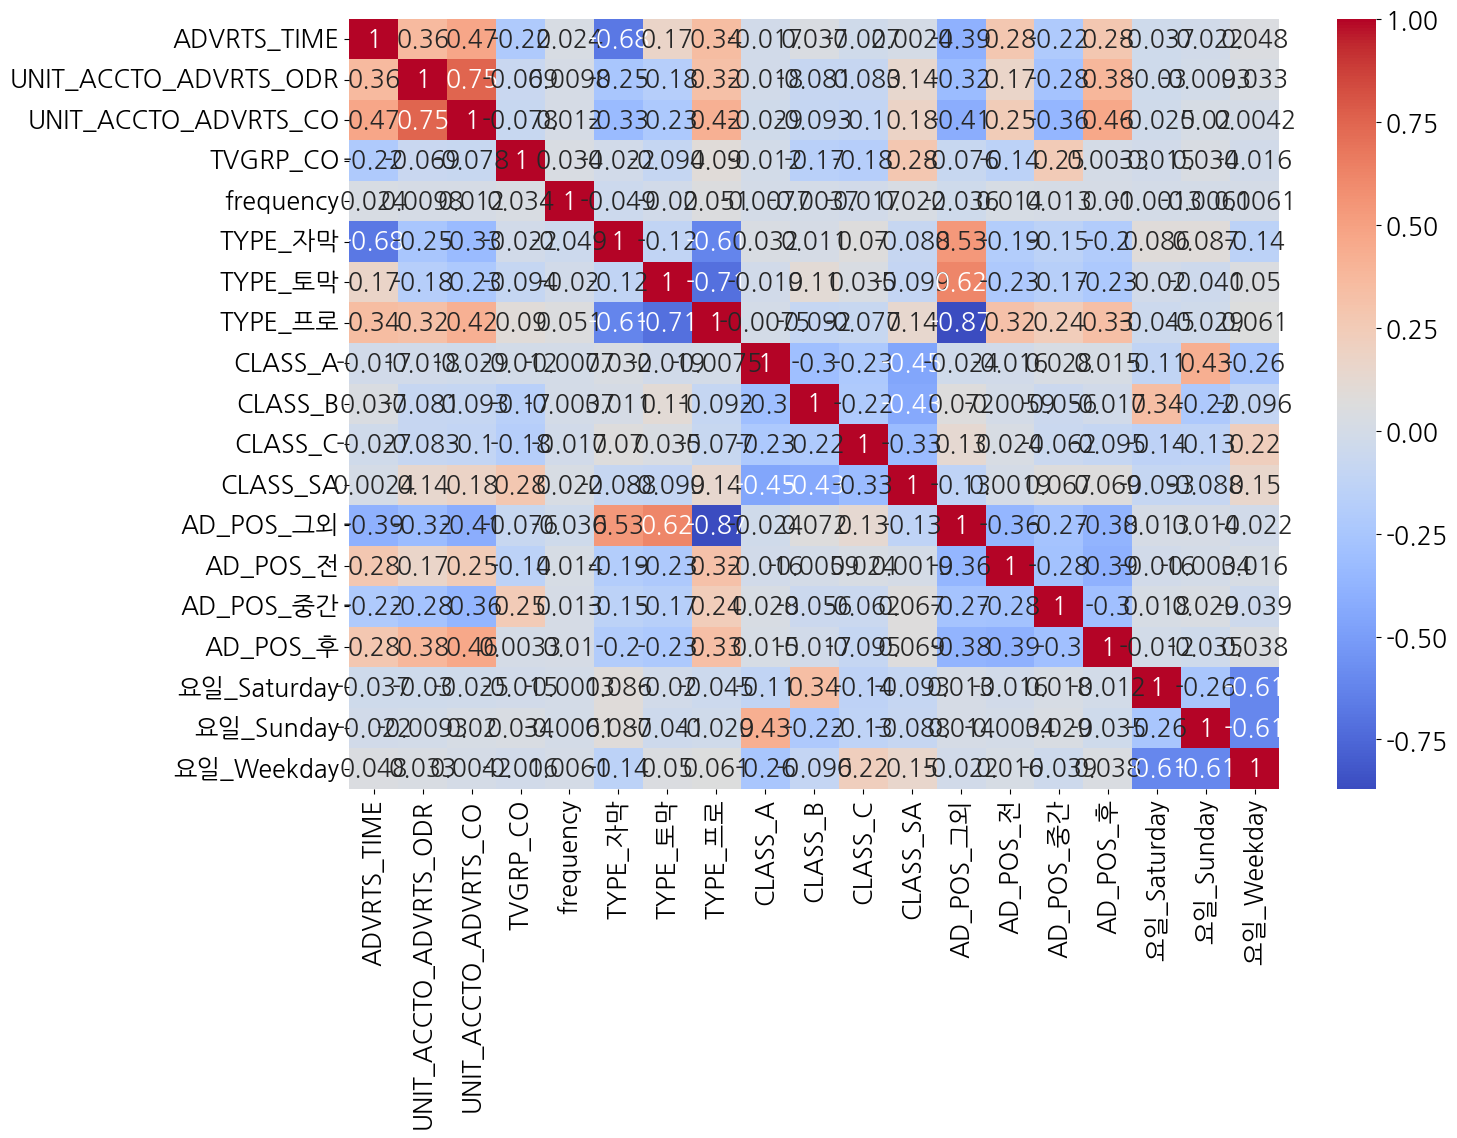

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

### Frequency=0 | Frequency = 1 Random Forest

Top 3 Features for Frequency = 0: ['CLASS_SA', 'AD_POS_중간', 'ADVRTS_TIME']


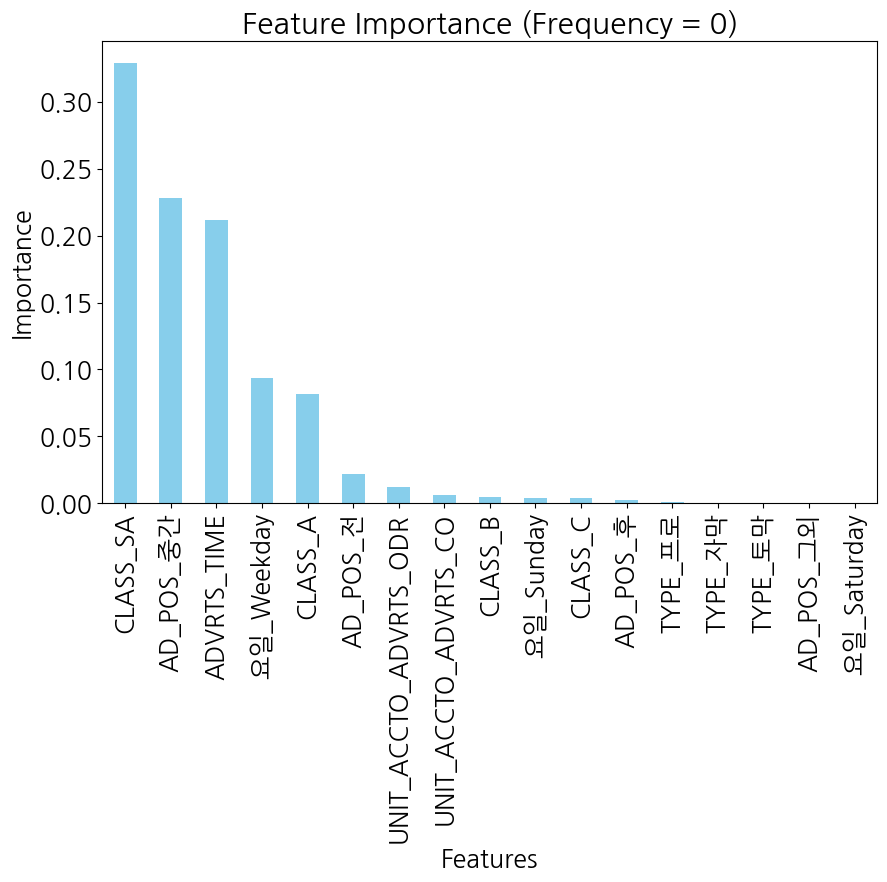

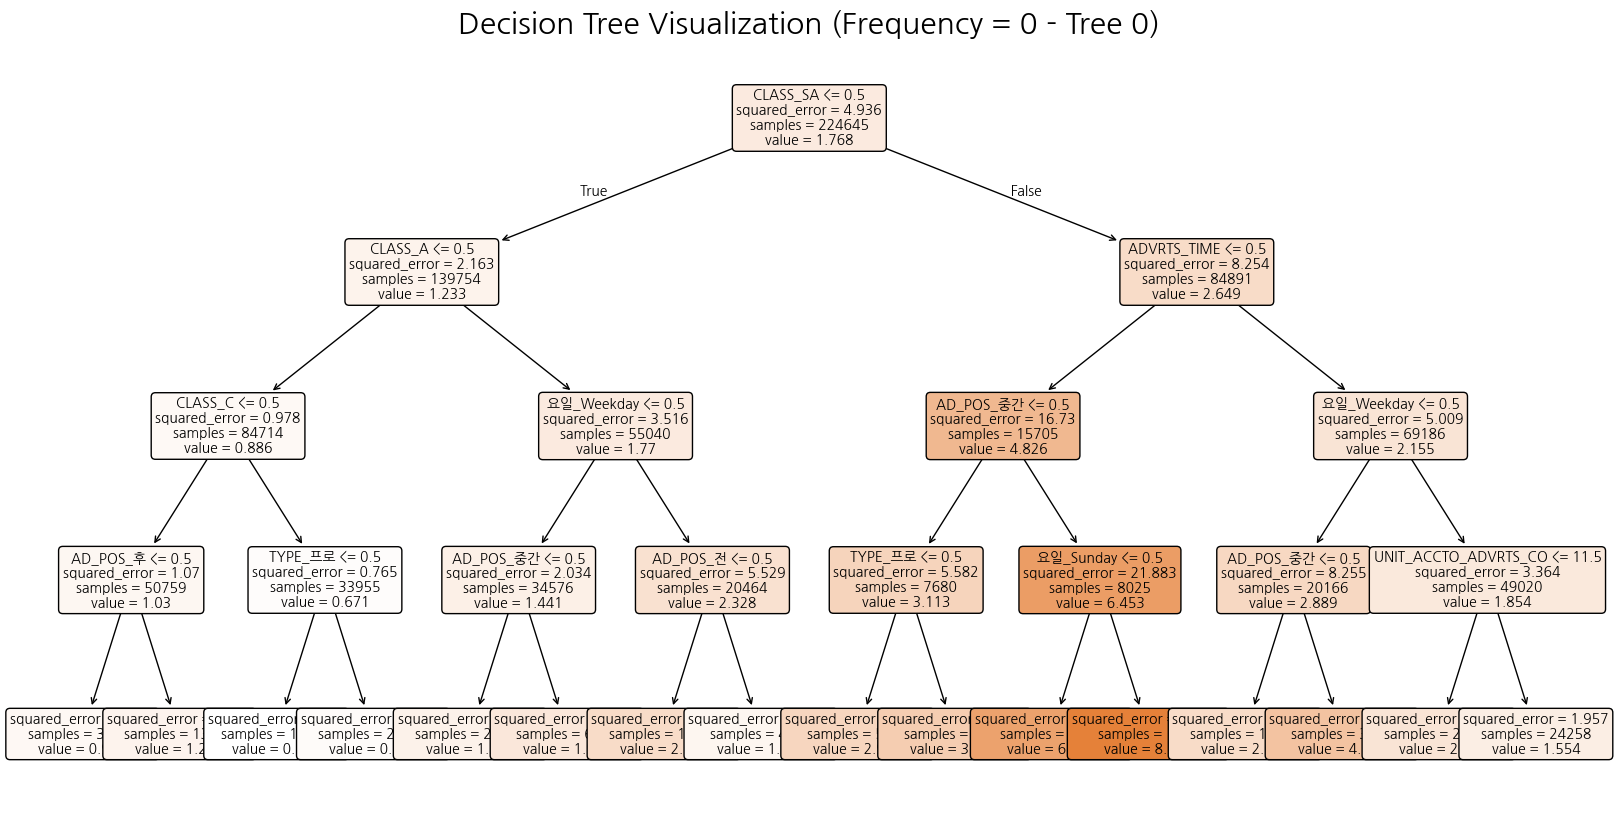

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import pandas as pd

# Function to train Random Forest, extract top features, and visualize feature importance
def analyze_random_forest(X, y, title, n_features=3, tree_index=0):

    model = RandomForestRegressor(random_state=42, n_estimators=100, max_depth=4)
    model.fit(X, y)


    importance = pd.Series(model.feature_importances_, index=X.columns)
    top_features = importance.sort_values(ascending=False).head(n_features).index.tolist()


    print(f"Top {n_features} Features for {title}: {top_features}")


    importance.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6), color='skyblue')
    plt.title(f"Feature Importance ({title})")
    plt.ylabel("Importance")
    plt.xlabel("Features")
    plt.show()


    tree = model.estimators_[tree_index]
    plt.figure(figsize=(20, 10))
    plot_tree(tree, feature_names=X.columns, filled=True, rounded=True, fontsize=10)
    plt.title(f"Decision Tree Visualization ({title} - Tree {tree_index})")
    plt.show()

    return top_features, model


df_0 = df[df['frequency'] == 0]
df_1 = df[df['frequency'] == 1]


X_0 = df_0.drop(columns=['TVGRP_CO', 'frequency'])
y_0 = df_0['TVGRP_CO']

X_1 = df_1.drop(columns=['TVGRP_CO', 'frequency'])
y_1 = df_1['TVGRP_CO']


#Frequency = 0
top_features_0, rf_model_0 = analyze_random_forest(X_0, y_0, "Frequency = 0")

Top 3 Features for Frequency = 1: ['ADVRTS_TIME', 'CLASS_SA', 'AD_POS_중간']


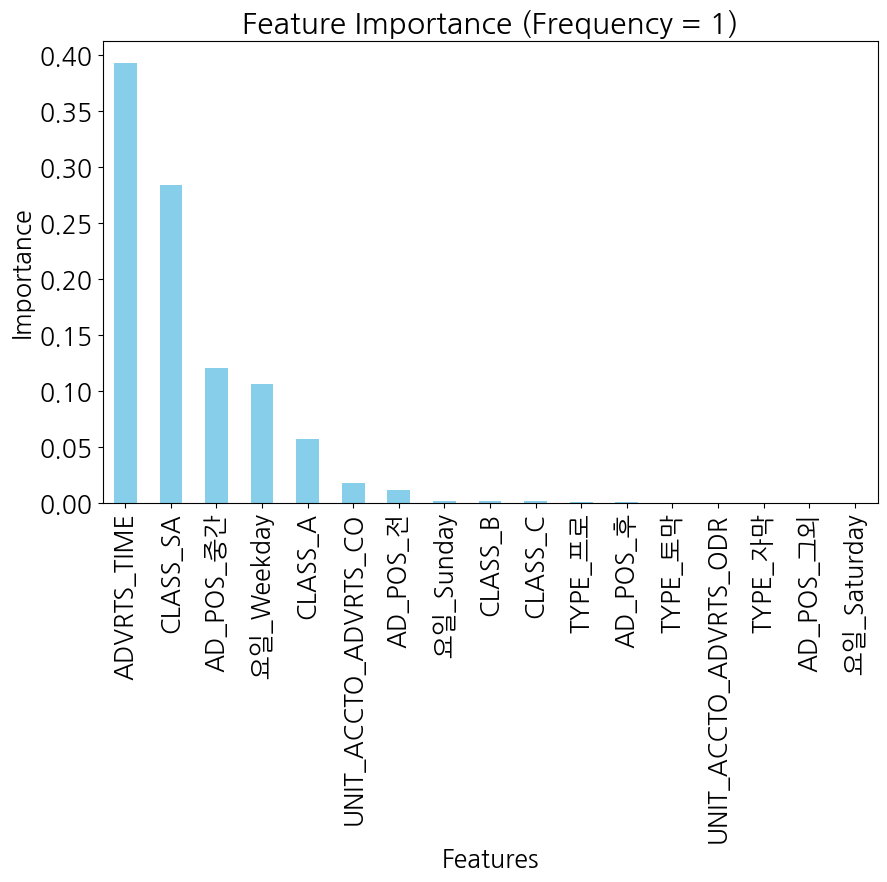

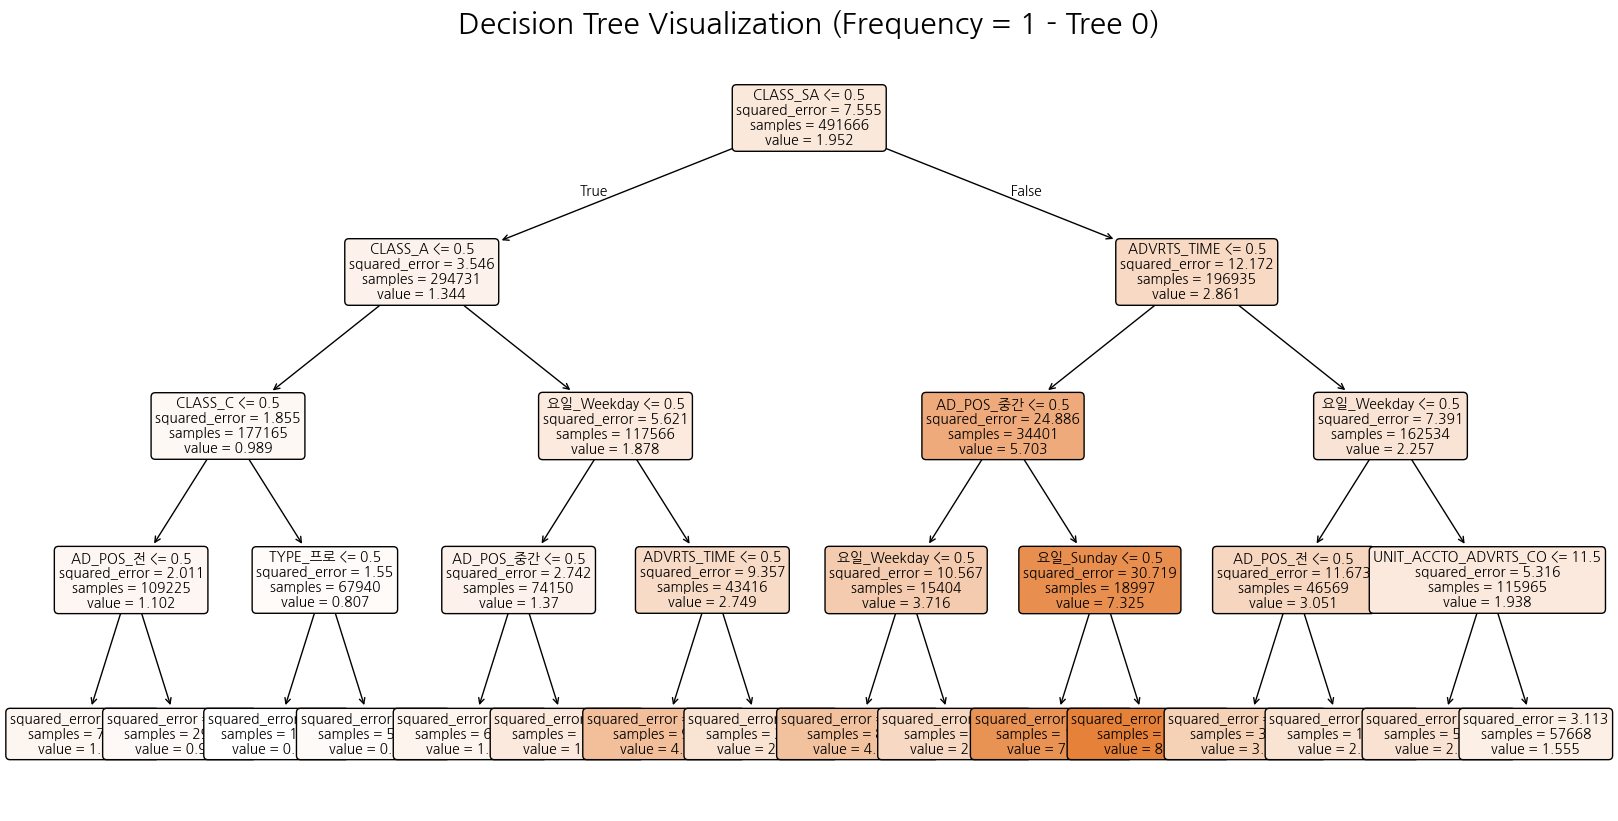

In [ ]:
#Frequency = 1
top_features_1, rf_model_1 = analyze_random_forest(X_1, y_1, "Frequency = 1")

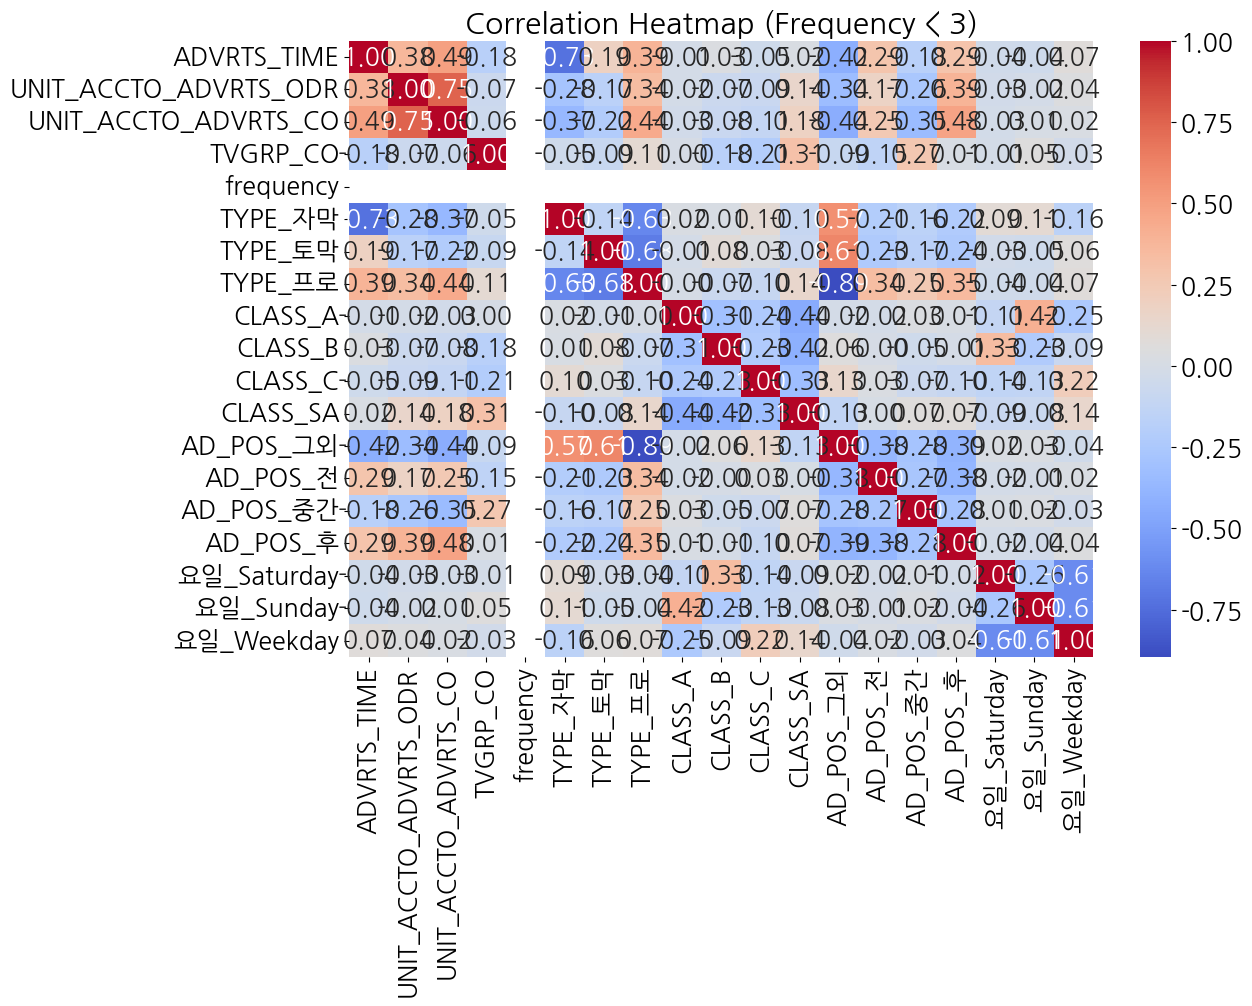

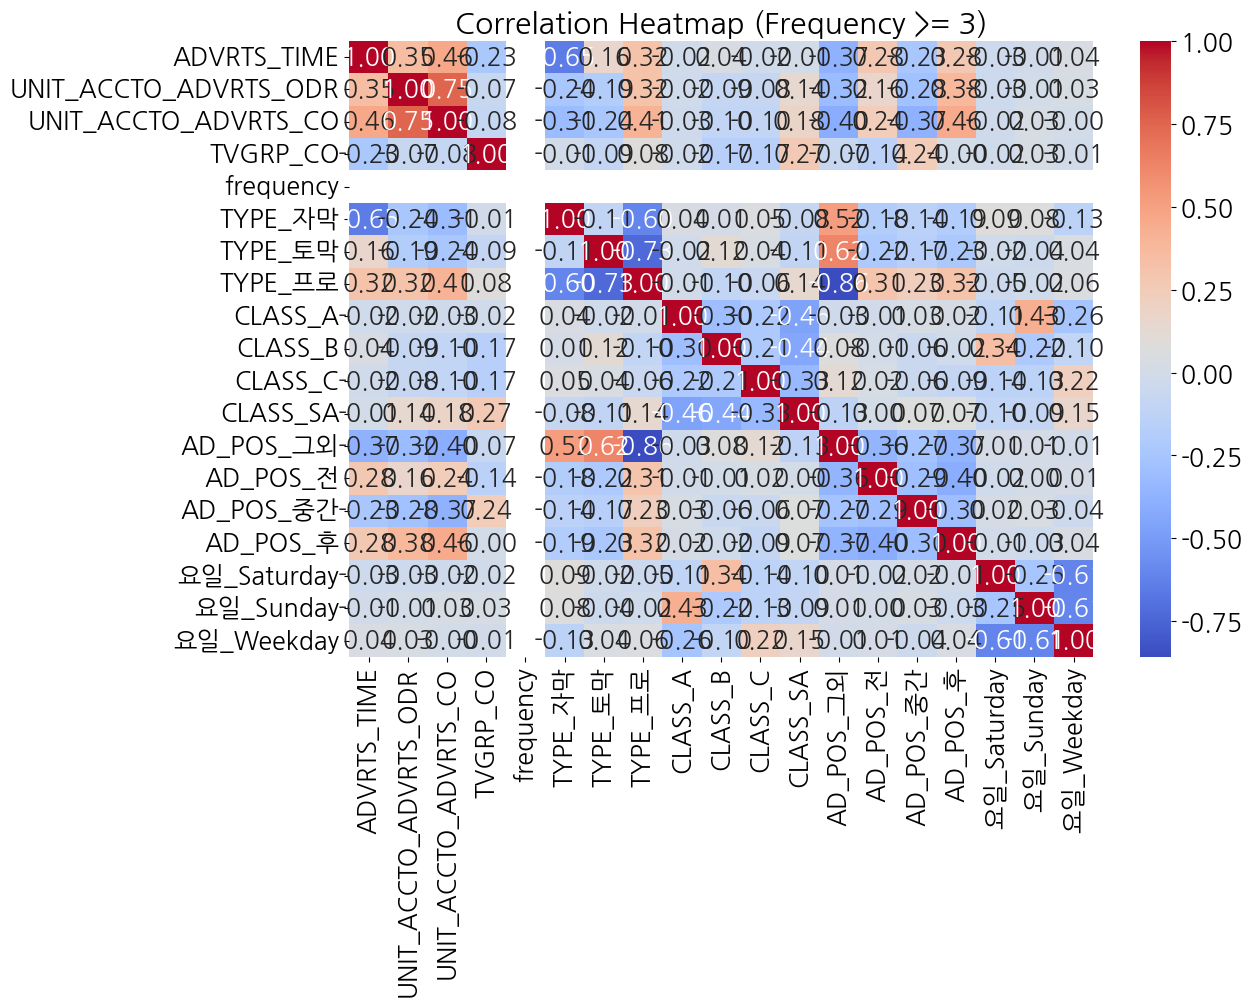

In [ ]:
import seaborn as sns

# Compute correlation matrices
corr_0 = df_0.corr()
corr_1 = df_1.corr()

# Plot correlation heatmaps
plt.figure(figsize=(12, 8))
sns.heatmap(corr_0, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Frequency < 3)")
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_1, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Frequency >= 3)")
plt.show()



#### 히트맵은 별 차이가 없다.

# Frequency, TVGRP는 Mann-Whitney U Statistics로 비교

In [ ]:
from scipy.stats import mannwhitneyu

group_0 = df[df['frequency'] == 0]['TVGRP_CO']
group_1 = df[df['frequency'] == 1]['TVGRP_CO']

stat, p = mannwhitneyu(group_0, group_1, alternative='two-sided')
print(f"Mann-Whitney U Statistic = {stat:.4f}, P-value = {p:.4f}")

if p < 0.05:
    print("Significant difference between the two groups.")
else:
    print("No significant difference between the two groups.")

Mann-Whitney U Statistic = 141318392615.0000, P-value = 0.0000
Significant difference between the two groups.


<ipython-input-112-0fd4b9d96e66>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='frequency', y='TVGRP_CO', data=df, palette='Set3')


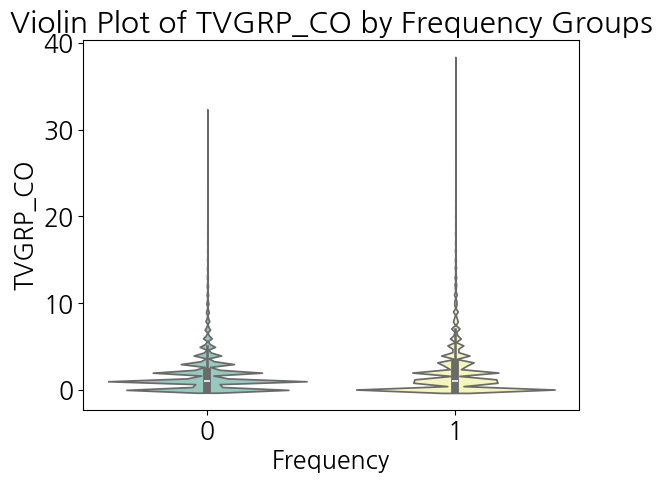

In [ ]:
sns.violinplot(x='frequency', y='TVGRP_CO', data=df, palette='Set3')
plt.title("Violin Plot of TVGRP_CO by Frequency Groups")
plt.xlabel("Frequency")
plt.ylabel("TVGRP_CO")
plt.show()

# 그룹이 3개 이상인 Class, Type는 Kruskal test

In [ ]:
from scipy.stats import kruskal
import pandas as pd

class_vars = ['CLASS_A', 'CLASS_B', 'CLASS_C', 'CLASS_SA']
type_vars = ['TYPE_자막', 'TYPE_토막', 'TYPE_프로']

def kruskal_test_for_variable(variable):

    groups = [df[df[variable] == 1]['TVGRP_CO'], df[df[variable] == 0]['TVGRP_CO']]

    #Kruskal-Wallis test
    stat, p = kruskal(*groups)
    return stat, p


print("Kruskal-Wallis Test for Class Variables:")
for var in class_vars:
    stat, p = kruskal_test_for_variable(var)
    print(f"{var}: Kruskal-Wallis Statistic = {stat:.4f}, P-value = {p:.4f}")


print("\nKruskal-Wallis Test for Type Variables:")
for var in type_vars:
    stat, p = kruskal_test_for_variable(var)
    print(f"{var}: Kruskal-Wallis Statistic = {stat:.4f}, P-value = {p:.4f}")

Kruskal-Wallis Test for Class Variables:
CLASS_A: Kruskal-Wallis Statistic = 438.7906, P-value = 0.0000
CLASS_B: Kruskal-Wallis Statistic = 29636.3625, P-value = 0.0000
CLASS_C: Kruskal-Wallis Statistic = 56886.0106, P-value = 0.0000
CLASS_SA: Kruskal-Wallis Statistic = 89427.9137, P-value = 0.0000

Kruskal-Wallis Test for Type Variables:
TYPE_자막: Kruskal-Wallis Statistic = 1035.3653, P-value = 0.0000
TYPE_토막: Kruskal-Wallis Statistic = 10221.0799, P-value = 0.0000
TYPE_프로: Kruskal-Wallis Statistic = 10610.9986, P-value = 0.0000


<ipython-input-114-2d6946378105>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[var], y=df['TVGRP_CO'], palette="Set2")


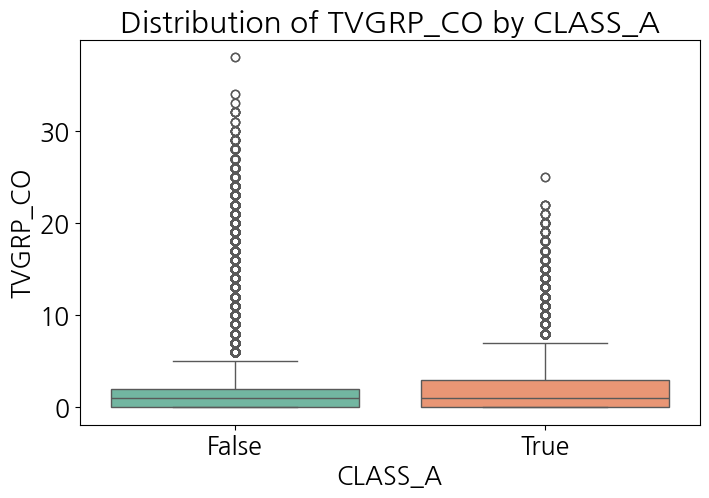

<ipython-input-114-2d6946378105>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[var], y=df['TVGRP_CO'], palette="Set2")


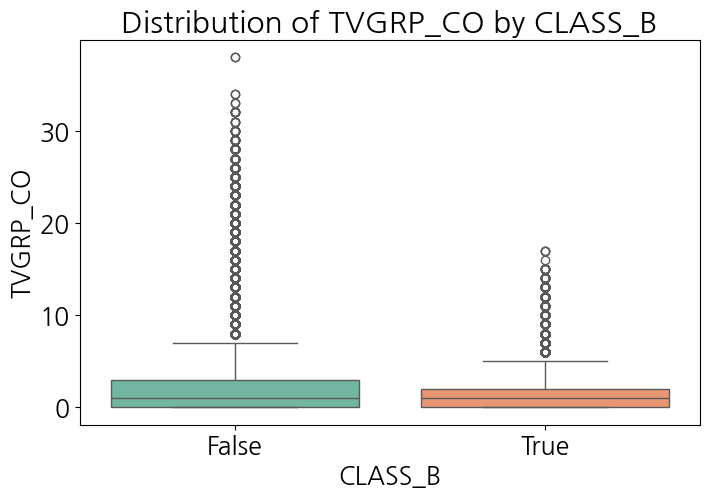

<ipython-input-114-2d6946378105>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[var], y=df['TVGRP_CO'], palette="Set2")


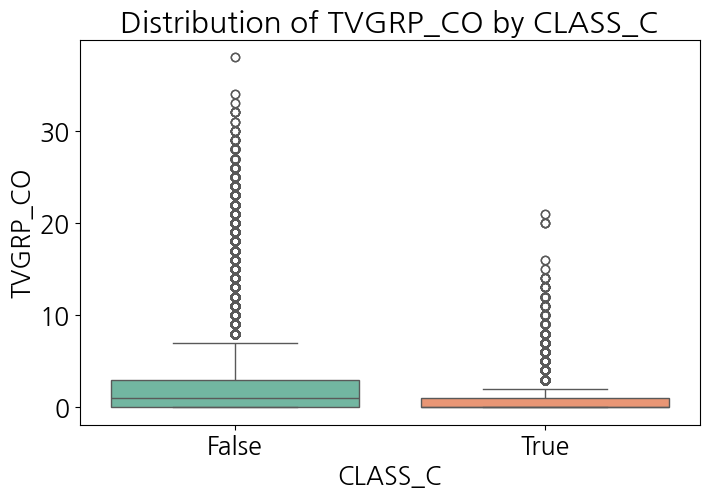

<ipython-input-114-2d6946378105>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[var], y=df['TVGRP_CO'], palette="Set2")


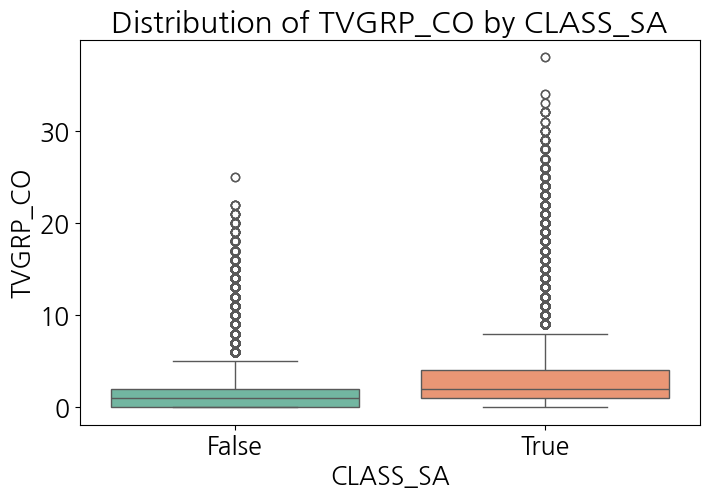

<ipython-input-114-2d6946378105>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[var], y=df['TVGRP_CO'], palette="Set3")


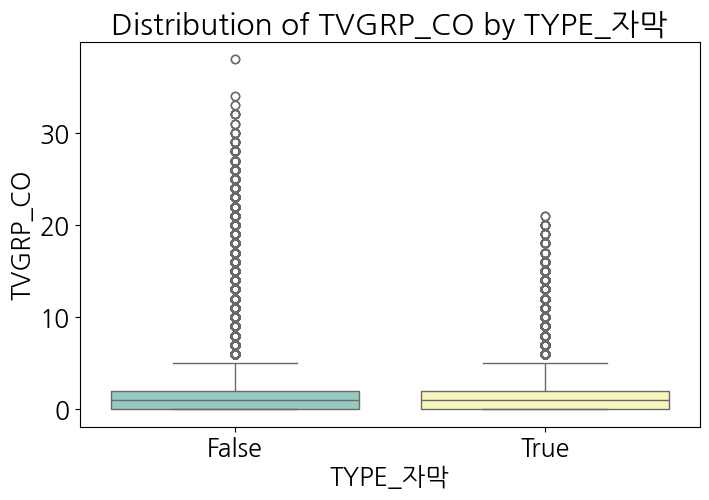

<ipython-input-114-2d6946378105>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[var], y=df['TVGRP_CO'], palette="Set3")


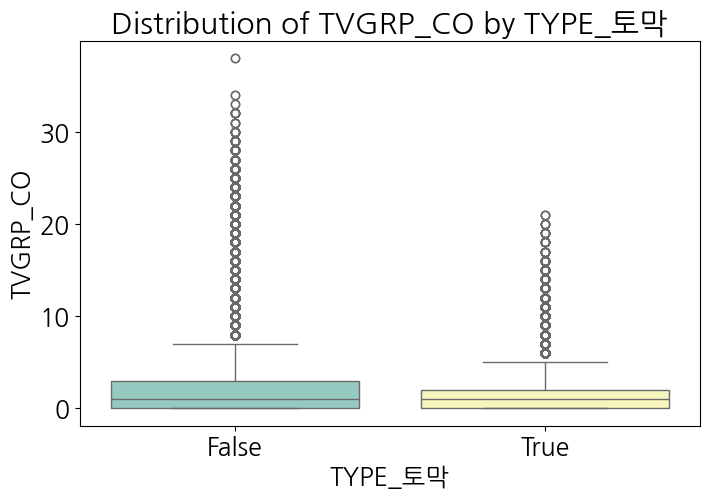

<ipython-input-114-2d6946378105>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[var], y=df['TVGRP_CO'], palette="Set3")


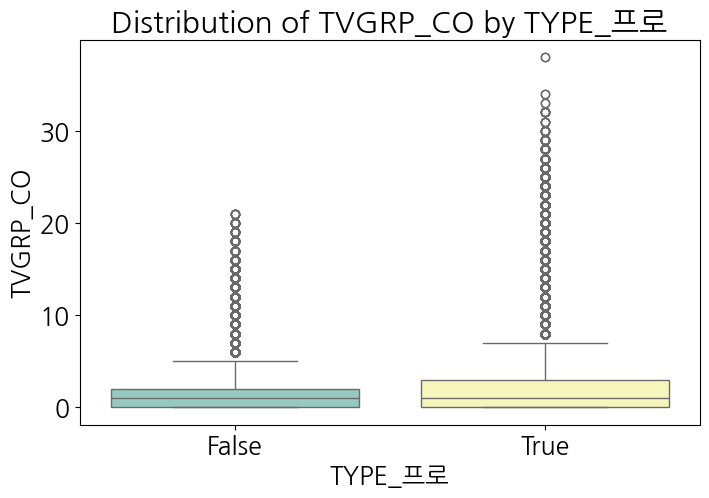

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#  Class변수 박스플랏
for var in class_vars:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df[var], y=df['TVGRP_CO'], palette="Set2")
    plt.title(f"Distribution of TVGRP_CO by {var}")
    plt.xlabel(var)
    plt.ylabel("TVGRP_CO")
    plt.show()

# Type변수 박스플랏
for var in type_vars:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df[var], y=df['TVGRP_CO'], palette="Set3")
    plt.title(f"Distribution of TVGRP_CO by {var}")
    plt.xlabel(var)
    plt.ylabel("TVGRP_CO")
    plt.show()


The difference in TVGRP_CO between CLASS_A=1 and CLASS_A=0 is significant.

The difference in TVGRP_CO between CLASS_B=1 and CLASS_B=0 is significant.

The difference in TVGRP_CO between CLASS_C=1 and CLASS_C=0 is significant.

The difference in TVGRP_CO between CLASS_SA=1 and CLASS_SA=0 is significant.

The difference in TVGRP_CO between TYPE_자막 =1 and TYPE_자막=0 is significant.

The difference in TVGRP_CO between TYPE_토막=1 and TYPE_토막=0 is significant.

The difference in TVGRP_CO between TYPE_프로 =1 and TYPE_프로=0 is significant.

# Regression

In [ ]:
#Boolean값 처리
df = df.astype(int)

In [ ]:
# 1. 교호작용 변수 추가
df['CLASS_SA_ADVRTS_TIME'] = df['CLASS_SA'] * df['ADVRTS_TIME']
df['AD_POS_MID_ADVRTS_TIME'] = df['AD_POS_중간'] * df['ADVRTS_TIME']
df['AD_POS_MID_UNIT_ODR'] = df['AD_POS_중간'] * df['UNIT_ACCTO_ADVRTS_ODR']

# 2. 데이터셋을 frequency에 따라 분리
df_0 = df[df['frequency'] == 0].copy()
df_1 = df[df['frequency'] == 1].copy()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import statsmodels.api as sm


def perform_regression(X, y, group_name):

    X = sm.add_constant(X)

    model = sm.OLS(y, X).fit()

    #평가
    y_pred = model.predict(X)
    r2 = model.rsquared
    mae = mean_absolute_error(y, y_pred)
    rmse = np.sqrt(mean_squared_error(y, y_pred))

    print(f"\nOLS Regression Results for {group_name}:")
    print(model.summary())
    print(f"R²: {r2:.4f}, MAE: {mae:.4f}, RMSE: {rmse:.4f}")

    return r2, mae, rmse


X_0_top = df_0[top_features_0 + ['CLASS_SA_ADVRTS_TIME', 'AD_POS_MID_ADVRTS_TIME', 'AD_POS_MID_UNIT_ODR']]
y_0 = df_0['TVGRP_CO']

X_1_top = df_1[top_features_1 + ['CLASS_SA_ADVRTS_TIME', 'AD_POS_MID_ADVRTS_TIME', 'AD_POS_MID_UNIT_ODR']]
y_1 = df_1['TVGRP_CO']


r2_0, mae_0, rmse_0 = perform_regression(X_0_top, y_0, "Frequency = 0 ")
r2_1, mae_1, rmse_1 = perform_regression(X_1_top, y_1, "Frequency = 1 ")


print("\nModel Comparison:")
if r2_0 > r2_1:
    print("Frequency = 0 has the better model based on R².")
    print(f"R² (Frequency = 0): {r2_0:.4f}, MAE: {mae_0:.4f}, RMSE: {rmse_0:.4f}")
    print(f"R² (Frequency = 1): {r2_1:.4f}, MAE: {mae_1:.4f}, RMSE: {rmse_1:.4f}")
else:
    print("Frequency = 1 has the better model based on R².")
    print(f"R² (Frequency = 0): {r2_1:.4f}, MAE: {mae_1:.4f}, RMSE: {rmse_1:.4f}")
    print(f"R² (Frequency = 1): {r2_0:.4f}, MAE: {mae_0:.4f}, RMSE: {rmse_0:.4f}")


OLS Regression Results for Frequency = 0 :
                            OLS Regression Results                            
Dep. Variable:               TVGRP_CO   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.227
Method:                 Least Squares   F-statistic:                 1.737e+04
Date:                Tue, 04 Feb 2025   Prob (F-statistic):               0.00
Time:                        06:01:43   Log-Likelihood:            -7.4154e+05
No. Observations:              355501   AIC:                         1.483e+06
Df Residuals:                  355494   BIC:                         1.483e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

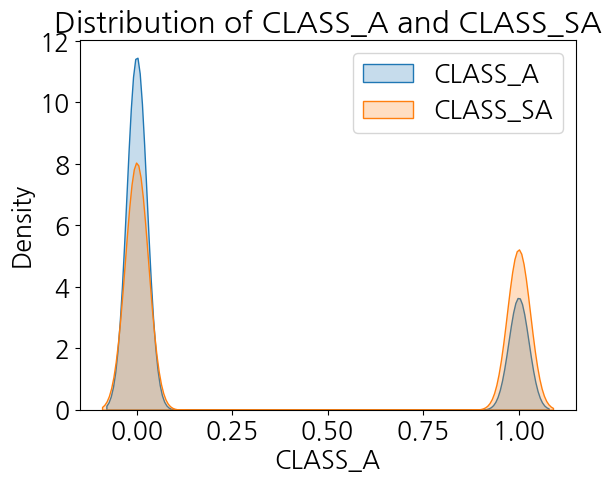

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.kdeplot(df['CLASS_A'], label='CLASS_A', fill=True)
sns.kdeplot(df['CLASS_SA'], label='CLASS_SA', fill=True)
plt.legend()
plt.title("Distribution of CLASS_A and CLASS_SA")
plt.show()


In [ ]:
from scipy.stats import f_oneway

stat, p_class_a = f_oneway(df[df['CLASS_A'] == 1]['TVGRP_CO'], df[df['CLASS_A'] == 0]['TVGRP_CO'])
stat, p_class_sa = f_oneway(df[df['CLASS_SA'] == 1]['TVGRP_CO'], df[df['CLASS_SA'] == 0]['TVGRP_CO'])

print(f"P-value for CLASS_A: {p_class_a}")
print(f"P-value for CLASS_SA: {p_class_sa}")


P-value for CLASS_A: 2.0595780124886986e-35
P-value for CLASS_SA: 0.0


In [ ]:
# 범주형 변수에서 baseline 제외
X = df.drop(columns=[
    'TVGRP_CO',  # 타겟 변수 제거
    'frequency',  # 이미 그룹으로 사용됨
    'TYPE_자막',  # 광고 유형 baseline
    'AD_POS_전',  # 광고 위치 baseline
    '요일_Weekday', #평일 baseline
])

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF 계산
X_vif = sm.add_constant(X)
vif = pd.DataFrame()
vif["Variable"] = X_vif.columns
vif["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

# VIF 결과 확인
print(vif)

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                  Variable        VIF
0                    const   0.000000
1              ADVRTS_TIME  10.147178
2    UNIT_ACCTO_ADVRTS_ODR   2.337326
3     UNIT_ACCTO_ADVRTS_CO   3.269446
4                  TYPE_토막   8.823539
5                  TYPE_프로   8.849603
6                  CLASS_A        inf
7                  CLASS_B        inf
8                  CLASS_C        inf
9                 CLASS_SA        inf
10               AD_POS_그외   6.720865
11               AD_POS_중간  12.845596
12                AD_POS_후   1.513818
13             요일_Saturday   1.230360
14               요일_Sunday   1.363548
15    CLASS_SA_ADVRTS_TIME   7.024500
16  AD_POS_MID_ADVRTS_TIME  10.145763
17     AD_POS_MID_UNIT_ODR   3.824304


In [ ]:
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


df_0 = df[df['frequency'] == 0]
df_1 = df[df['frequency'] == 1]


X_0 = df_0.drop(columns=['TVGRP_CO', 'frequency'])
y_0 = df_0['TVGRP_CO']

X_1 = df_1.drop(columns=['TVGRP_CO', 'frequency'])
y_1 = df_1['TVGRP_CO']


def perform_regression(X, y, group_name):
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()

    #모델 평가
    y_pred = model.predict(X)
    r2 = model.rsquared
    mae = mean_absolute_error(y, y_pred)
    rmse = np.sqrt(mean_squared_error(y, y_pred))

    print(f"\nOLS Regression Results for {group_name}:")
    print(model.summary())
    print(f"R²: {r2:.4f}, MAE: {mae:.4f}, RMSE: {rmse:.4f}")

    return model, r2, mae, rmse


model_0, r2_0, mae_0, rmse_0 = perform_regression(X_0, y_0, "Frequency = 0")
model_1, r2_1, mae_1, rmse_1 = perform_regression(X_1, y_1, "Frequency = 1")


print("\nModel Comparison:")
if r2_0 > r2_1:
    print("Frequency = 0 has a better model based on R².")
else:
    print("Frequency = 1 has a better model based on R².")



OLS Regression Results for Frequency = 0:
                            OLS Regression Results                            
Dep. Variable:               TVGRP_CO   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.258
Method:                 Least Squares   F-statistic:                     7711.
Date:                Tue, 04 Feb 2025   Prob (F-statistic):               0.00
Time:                        06:05:47   Log-Likelihood:            -7.3427e+05
No. Observations:              355501   AIC:                         1.469e+06
Df Residuals:                  355484   BIC:                         1.469e+06
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Function to compute VIF
def compute_vif(X):
    X = sm.add_constant(X)  # Add constant term
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data.sort_values(by="VIF", ascending=False)

# Compute VIF for Frequency =0
print("\nVIF for Frequency = 0  Model:")
vif_0 = compute_vif(X_0)
print(vif_0)

# Compute VIF for Frequency =1
print("\nVIF for Frequency = 1 Model:")
vif_1 = compute_vif(X_1)
print(vif_1)



VIF for Frequency = 0  Model:


/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                   Feature        VIF
10                CLASS_SA        inf
17              요일_Weekday        inf
15             요일_Saturday        inf
14                AD_POS_후        inf
13               AD_POS_중간        inf
12                AD_POS_전        inf
11               AD_POS_그외        inf
9                  CLASS_C        inf
8                  CLASS_B        inf
7                  CLASS_A        inf
6                  TYPE_프로        inf
5                  TYPE_토막        inf
4                  TYPE_자막        inf
16               요일_Sunday        inf
1              ADVRTS_TIME  12.056637
19  AD_POS_MID_ADVRTS_TIME  10.916022
18    CLASS_SA_ADVRTS_TIME   6.710825
20     AD_POS_MID_UNIT_ODR   3.816038
3     UNIT_ACCTO_ADVRTS_CO   3.337159
2    UNIT_ACCTO_ADVRTS_ODR   2.356608
0                    const   0.000000

VIF for Frequency = 1 Model:


/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                   Feature       VIF
10                CLASS_SA       inf
17              요일_Weekday       inf
15             요일_Saturday       inf
14                AD_POS_후       inf
13               AD_POS_중간       inf
12                AD_POS_전       inf
11               AD_POS_그외       inf
9                  CLASS_C       inf
8                  CLASS_B       inf
7                  CLASS_A       inf
6                  TYPE_프로       inf
5                  TYPE_토막       inf
4                  TYPE_자막       inf
16               요일_Sunday       inf
19  AD_POS_MID_ADVRTS_TIME  9.853555
1              ADVRTS_TIME  9.412528
18    CLASS_SA_ADVRTS_TIME  7.175866
20     AD_POS_MID_UNIT_ODR  3.827781
3     UNIT_ACCTO_ADVRTS_CO  3.240786
2    UNIT_ACCTO_ADVRTS_ODR  2.328639
0                    const  0.000000


범주형 데이터들이 다중공선성 매우 높게 나옴

#다중공선성 완화시켜주는 Elastic Net 적용:

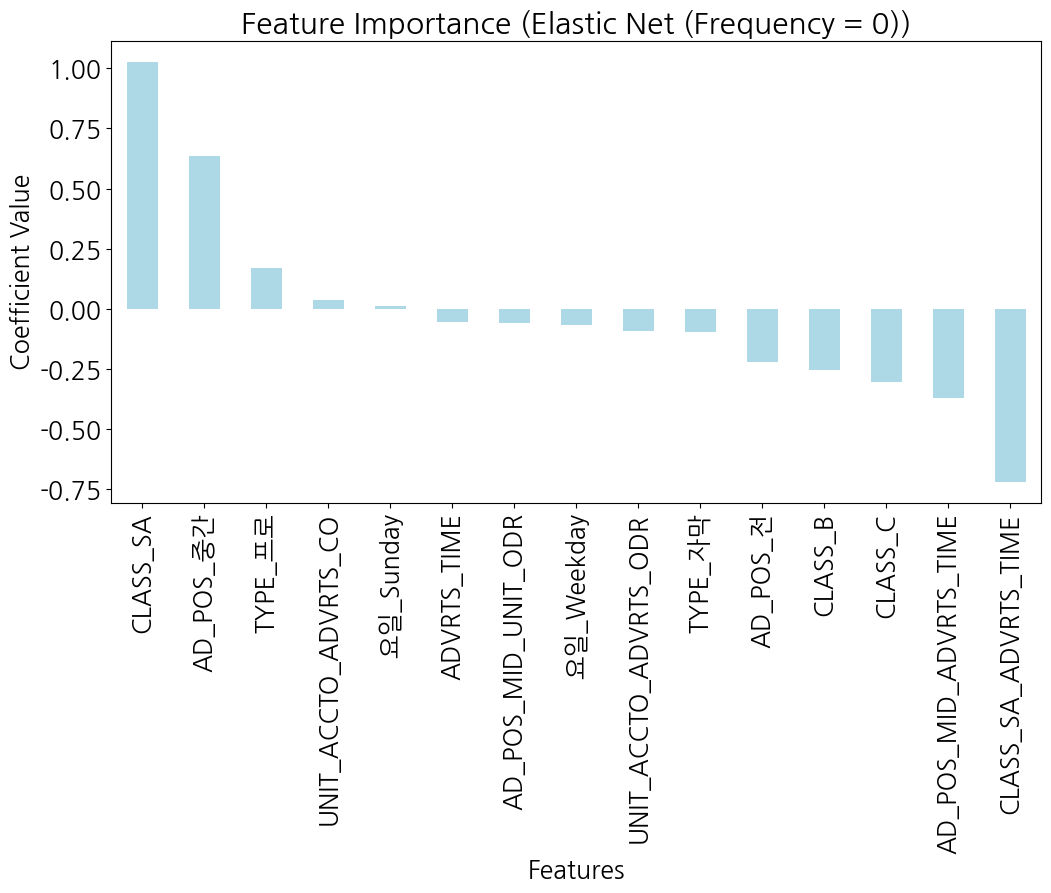

Elastic Net (Frequency = 0) R²: 0.2571


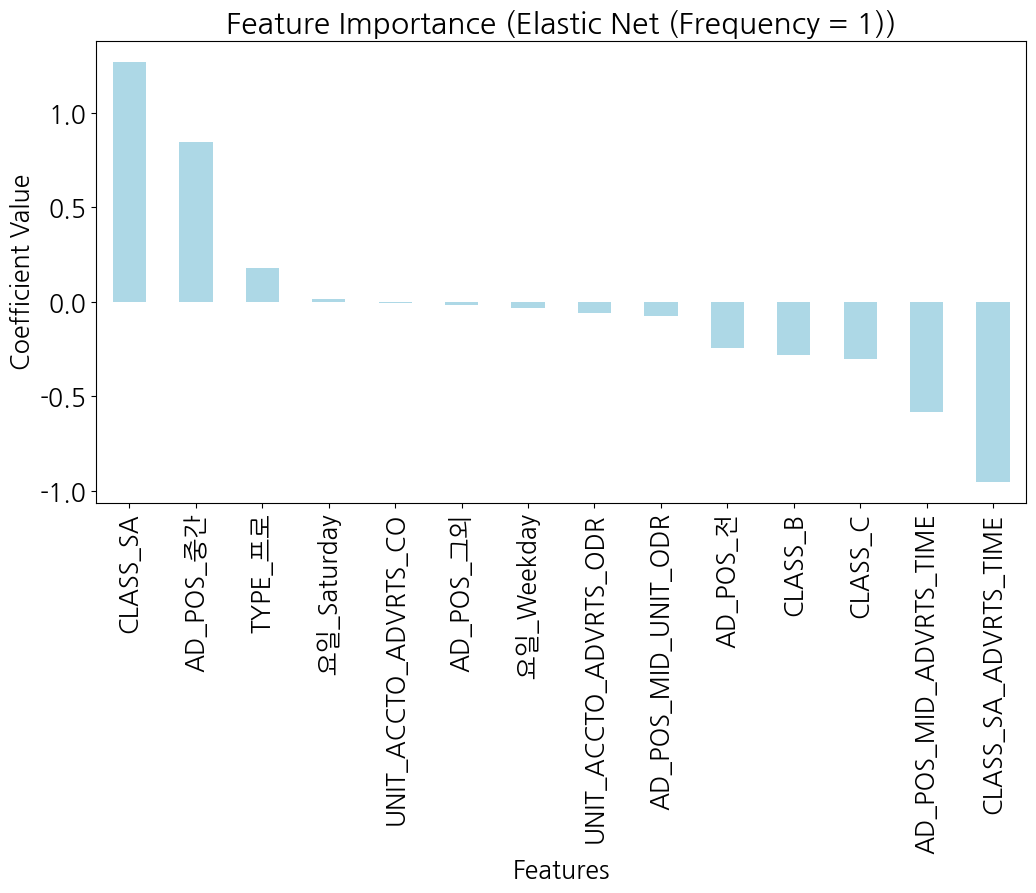

Elastic Net (Frequency = 1) R²: 0.2256


In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

# 데이터 분리: frequency=0, frequency=1
df_0 = df[df['frequency'] == 0]
df_1 = df[df['frequency'] == 1]

X_0 = df_0.drop(columns=['TVGRP_CO', 'frequency'])
y_0 = df_0['TVGRP_CO']

X_1 = df_1.drop(columns=['TVGRP_CO', 'frequency'])
y_1 = df_1['TVGRP_CO']

# 데이터 스케일링 함수
def scale_data(X):
    scaler = StandardScaler()
    return scaler.fit_transform(X)

# Elastic Net 회귀 분석 함수
def elastic_net_regression(X_scaled, y, title):
    elastic_net = ElasticNet(alpha=0.01, l1_ratio=0.5, random_state=42)  # Elastic Net 모델 정의
    elastic_net.fit(X_scaled, y)  # 모델 학습

    # 변수 중요도 시각화
    coefficients = pd.Series(elastic_net.coef_, index=X.columns)
    coefficients[coefficients != 0].sort_values(ascending=False).plot(kind='bar', figsize=(12, 6), color='lightblue')
    plt.title(f"Feature Importance ({title})")
    plt.xlabel("Features")
    plt.ylabel("Coefficient Value")
    plt.show()

    # 모델 성능 출력
    print(f"{title} R²: {elastic_net.score(X_scaled, y):.4f}")

# frequency=0에 대해 Elastic Net 분석
X_0_scaled = scale_data(X_0)
elastic_net_regression(X_0_scaled, y_0, "Elastic Net (Frequency = 0)")

# frequency=1에 대해 Elastic Net 분석
X_1_scaled = scale_data(X_1)
elastic_net_regression(X_1_scaled, y_1, "Elastic Net (Frequency = 1)")


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
import pandas as pd

# 데이터 분리: frequency=0, frequency=1
df_0 = df[df['frequency'] == 0]
df_1 = df[df['frequency'] == 1]

# Elastic Net 및 VIF 계산 함수
def elastic_net_vif(df_subset, target, alpha=0.01, l1_ratio=0.5):
    # 데이터 분리
    X = df_subset.drop(columns=[target, 'frequency'])
    y = df_subset[target]

    # 데이터 스케일링
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_columns = X.columns

    # Elastic Net 모델 적용
    elastic_net = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=42)
    elastic_net.fit(X_scaled, y)

    # 선택된 변수만 유지
    selected_features = X_columns[elastic_net.coef_ != 0]
    X_selected = df_subset[selected_features]

    # VIF 계산
    vif_data = pd.DataFrame()
    vif_data["Variable"] = selected_features
    vif_data["VIF"] = [variance_inflation_factor(X_selected.values, i) for i in range(X_selected.shape[1])]

    # VIF 출력
    print(f"\nVIF Results for Subset (Frequency = {int(df_subset['frequency'].iloc[0])}):")
    print(vif_data.sort_values(by="VIF", ascending=False))

# frequency=0에 대해 Elastic Net 및 VIF 계산
elastic_net_vif(df_0, target='TVGRP_CO')

# frequency=1에 대해 Elastic Net 및 VIF 계산
elastic_net_vif(df_1, target='TVGRP_CO')



VIF Results for Subset (Frequency = 0):
                  Variable        VIF
0              ADVRTS_TIME  11.928576
7                 CLASS_SA   9.662400
12    CLASS_SA_ADVRTS_TIME   9.313335
4                  TYPE_프로   9.064947
2     UNIT_ACCTO_ADVRTS_CO   7.857463
9                AD_POS_중간   7.134840
13  AD_POS_MID_ADVRTS_TIME   6.220052
1    UNIT_ACCTO_ADVRTS_ODR   4.731099
14     AD_POS_MID_UNIT_ODR   4.304259
11              요일_Weekday   4.068657
10               요일_Sunday   2.282912
5                  CLASS_B   2.233999
3                  TYPE_자막   1.933053
8                 AD_POS_전   1.870909
6                  CLASS_C   1.821156

VIF Results for Subset (Frequency = 1):
                  Variable        VIF
5                 CLASS_SA  10.474420
11    CLASS_SA_ADVRTS_TIME   9.353313
2                  TYPE_프로   8.874382
1     UNIT_ACCTO_ADVRTS_CO   7.391243
8                AD_POS_중간   6.219253
12  AD_POS_MID_ADVRTS_TIME   4.989487
10              요일_Weekday   4.738797
0    U

* Elastic Net이 다중공선성을 유발하는 변수를 제거했다면, 일부 계수(coefficient)가 0이 되고 변수 개수가 줄어듦.
* 회귀 계수가 0이 된 변수는 다중공선성 문제를 일으켰을 가능성이 높음